# Analysis and Estadistics

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import date, timedelta
import time
from pylab import rcParams
import statsmodels.api as sm
import itertools

from alpha_vantage.cryptocurrencies import CryptoCurrencies
# pip install alpha_vantage

In [2]:
#KW is the Whale Alert key and KY is the Alpha Vantage key
key_whale = pd.read_csv('WAk.txt',names='A')
kw = key_whale.iloc[0][0]
key_alpha = pd.read_csv('AVk.txt',names='A')
ka = key_alpha.iloc[0][0]

In [86]:
cc = CryptoCurrencies(key=ka, output_format='pandas')
cryptos=['BTC','ETC','ETH','XRP','XLM','TRX']
for a in cryptos:
    data, meta_data = cc.get_digital_currency_daily(symbol=a, market='USD')
    try:
        data.drop(index=date.today(),inplace=True)
    except:
        pass
    data.to_csv(f'Crypto_{a}_DF.csv')
    time.sleep(10)


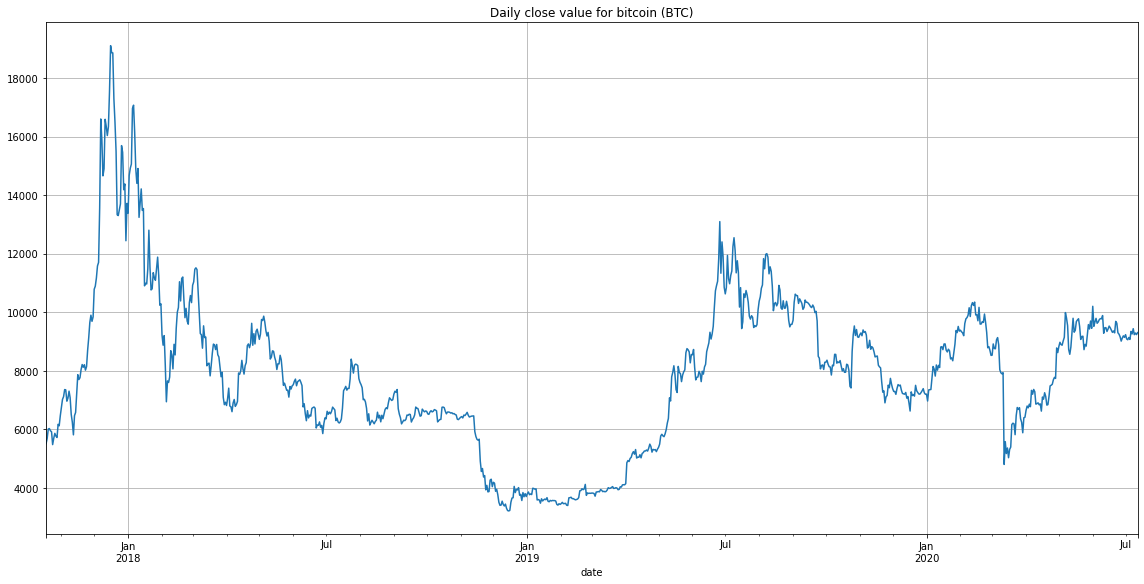

In [23]:

data['4b. close (USD)'].plot(figsize=(16,8))
plt.tight_layout()
plt.title('Daily close value for bitcoin (BTC)')
plt.grid()
plt.show()

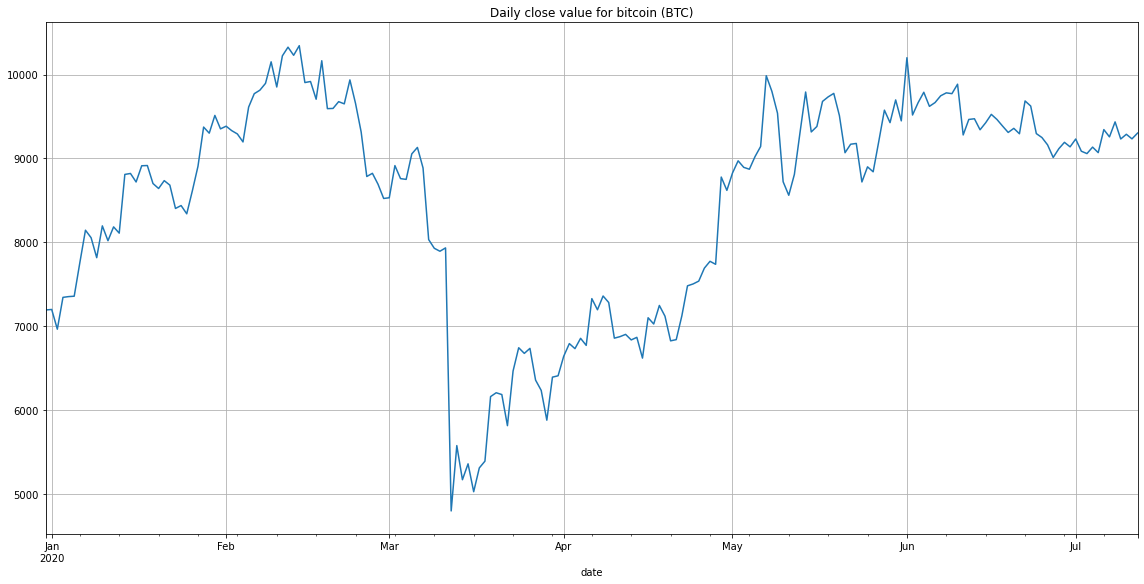

In [30]:
data['4b. close (USD)'].tail(195).plot(figsize=(16,8))
plt.tight_layout()
plt.title('Daily close value for bitcoin (BTC)')
plt.grid()
plt.show()

In [34]:
data.tail(150).describe().T

,count,mean,std,min,25%,50%,75%,max
1a. open (USD),150.0,8428.795267,1369.677359,4800.010,7210.140000,9038.000000,9460.787500,10344.360000
1b. open (USD),150.0,8428.795267,1369.677359,4800.010,7210.140000,9038.000000,9460.787500,10344.360000
2a. high (USD),150.0,8641.777933,1308.574590,5365.420,7359.335000,9193.620000,9620.417500,10381.560000
2b. high (USD),150.0,8641.777933,1308.574590,5365.420,7359.335000,9193.620000,9620.417500,10381.560000
3a. low (USD),150.0,8175.497467,1417.856528,3782.130,7015.800000,8802.360000,9248.750000,10111.370000
3b. low (USD),150.0,8175.497467,1417.856528,3782.130,7015.800000,8802.360000,9248.750000,10111.370000
4a. close (USD),150.0,8422.797667,1363.566141,4800.000,7210.140000,9038.255000,9445.217500,10344.360000
4b. close (USD),150.0,8422.797667,1363.566141,4800.000,7210.140000,9038.255000,9445.217500,10344.360000
5. volume,150.0,79166.528978,51350.685639,22561.366,47061.550875,61528.881164,92986.338576,402201.673764
6. market cap (USD),150.0,79166.528978,51350.685639,22561.366,47061.550875,61528.881164,92986.338576,402201.673764


In [5]:
data.to_csv('BTC_DF.csv')

In [6]:
data.head(2)

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2020-07-12,9234.02,9234.02,9345.00,9345.00,9157.50,9157.50,9302.75,9302.75,30872.702286,30872.702286
2020-07-11,9288.34,9288.34,9299.28,9299.28,9178.25,9178.25,9234.03,9234.03,22561.366000,22561.366000


In [80]:
data.sort_values(by='date',ascending=True,inplace=True)

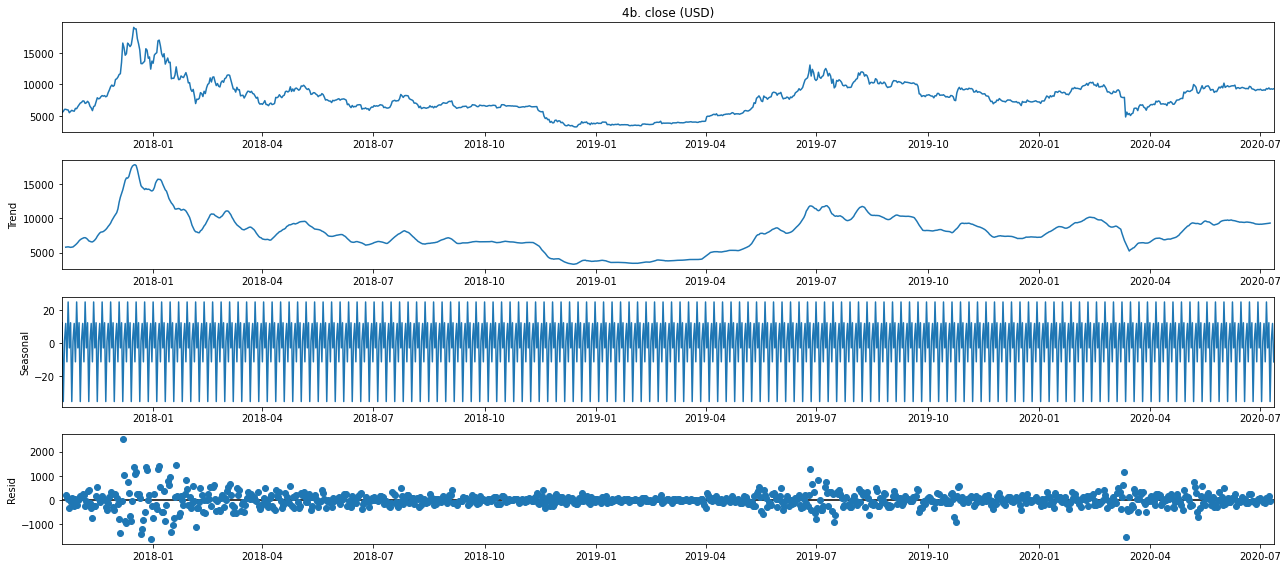

In [81]:

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data['4b. close (USD)'],model='additive')
fir = decomposition.plot()
plt.show()

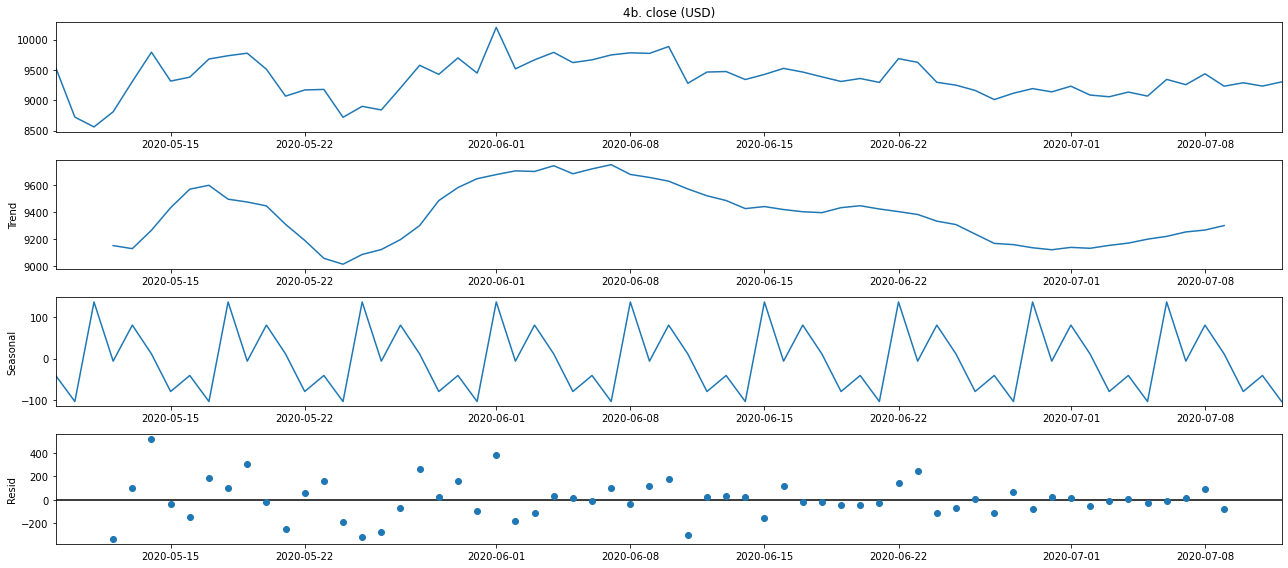

In [83]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data['4b. close (USD)'].tail(65),model='additive')
fir = decomposition.plot()
plt.show()

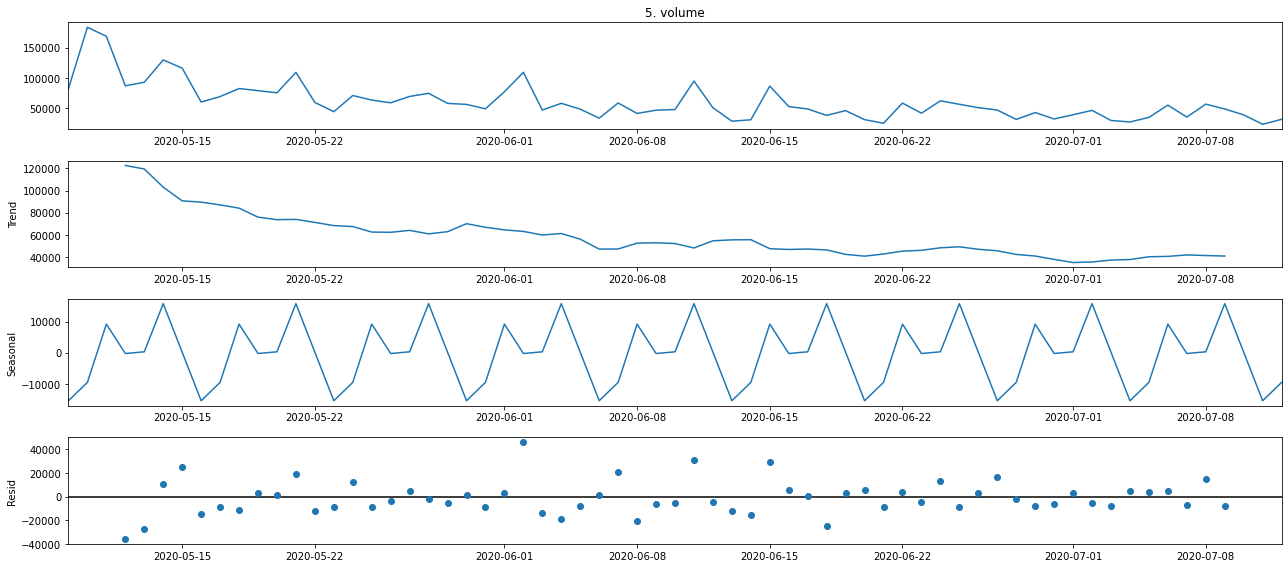

In [82]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data['5. volume'].tail(65),model='additive')
fir = decomposition.plot()
plt.show()

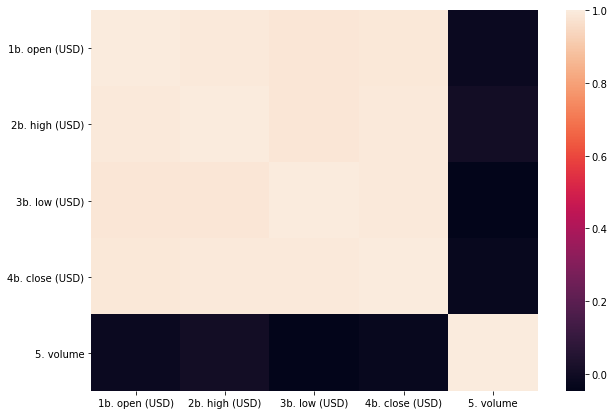

In [64]:
plt.figure(figsize=(10,7))
data2 = data[['1b. open (USD)','2b. high (USD)','3b. low (USD)','4b. close (USD)','5. volume']]
c = data2.corr()
sns.heatmap(c)

In [10]:
p = d = q = range(0,2)
#grid search sobre metaparametros 
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1],x[2],12) for x in list(itertools.product(p,d,q))]
for param in pdq:
    for param_estacionales in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data['5. volume'].tail(65),
                                           order=param,
                                           seasonal_order=param_estacionales,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results = mod.fit()
            print(f'ARIMA {param} x {param_estacionales}12-AIC:{results.aic}')
        except:
            continue

C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 0, 0) x (0, 0, 0, 12)12-AIC:1606.478922394887
ARIMA (0, 0, 0) x (0, 0, 1, 12)12-AIC:1245.2202001138185
ARIMA (0, 0, 0) x (0, 1, 0, 12)12-AIC:1241.1212530638675
ARIMA (0, 0, 0) x (0, 1, 1, 12)12-AIC:910.3274382684044
ARIMA (0, 0, 0) x (1, 0, 0, 12)12-AIC:1229.8842021642752

C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency inf


ARIMA (0, 0, 0) x (1, 0, 1, 12)12-AIC:1188.0928112562422
ARIMA (0, 0, 0) x (1, 1, 0, 12)12-AIC:948.1950150941382
ARIMA (0, 0, 0) x (1, 1, 1, 12)12-AIC:915.90595024257


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 0, 1) x (0, 0, 0, 12)12-AIC:1531.6264884178681
ARIMA (0, 0, 1) x (0, 0, 1, 12)12-AIC:1230.4781868683542
ARIMA (0, 0, 1) x (0, 1, 0, 12)12-AIC:1193.2184990554927
ARIMA (0, 0, 1) x (0, 1, 1, 12)12-AIC:892.2930846306723
ARIMA (0, 0, 1) x (1, 0, 0, 12)12-AIC:1276.645185727277
ARIMA (0, 0, 1) x (1, 0, 1, 12)12-AIC:1227.8623436538062
ARIMA (0, 0, 1) x (1, 1, 0, 12)12-AIC:949.6184821628227


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 0, 1) x (1, 1, 1, 12)12-AIC:894.2132423515988
ARIMA (0, 1, 0) x (0, 0, 0, 12)12-AIC:1456.546467204508
ARIMA (0, 1, 0) x (0, 0, 1, 12)12-AIC:1175.7278002833502
ARIMA (0, 1, 0) x (0, 1, 0, 12)12-AIC:1217.4090743710728
ARIMA (0, 1, 0) x (0, 1, 1, 12)12-AIC:900.121562229157
ARIMA (0, 1, 0) x (1, 0, 0, 12)12-AIC:1187.9795214256972


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 1, 0) x (1, 0, 1, 12)12-AIC:1176.7820385297123
ARIMA (0, 1, 0) x (1, 1, 0, 12)12-AIC:944.74861393849
ARIMA (0, 1, 0) x (1, 1, 1, 12)12-AIC:901.021590075966
ARIMA (0, 1, 1) x (0, 0, 0, 12)12-AIC:1405.1405072950042


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 1, 1) x (0, 0, 1, 12)12-AIC:1123.870269660564
ARIMA (0, 1, 1) x (0, 1, 0, 12)12-AIC:1162.4752763466308
ARIMA (0, 1, 1) x (0, 1, 1, 12)12-AIC:874.4778239649092
ARIMA (0, 1, 1) x (1, 0, 0, 12)12-AIC:1171.1564082900213


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 1, 1) x (1, 0, 1, 12)12-AIC:1124.5128463860276
ARIMA (0, 1, 1) x (1, 1, 0, 12)12-AIC:927.0508030690555


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 1, 1) x (1, 1, 1, 12)12-AIC:874.8585246173104
ARIMA (1, 0, 0) x (0, 0, 0, 12)12-AIC:1491.233984910003
ARIMA (1, 0, 0) x (0, 0, 1, 12)12-AIC:1192.066170846075
ARIMA (1, 0, 0) x (0, 1, 0, 12)12-AIC:1235.9809304190092


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 0, 0) x (0, 1, 1, 12)12-AIC:926.9854634616191
ARIMA (1, 0, 0) x (1, 0, 0, 12)12-AIC:1192.770488286873
ARIMA (1, 0, 0) x (1, 0, 1, 12)12-AIC:1191.4276786629107
ARIMA (1, 0, 0) x (1, 1, 0, 12)12-AIC:934.383658186596


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 0, 0) x (1, 1, 1, 12)12-AIC:928.9844221685813
ARIMA (1, 0, 1) x (0, 0, 0, 12)12-AIC:1432.4327394346433


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 0, 1) x (0, 0, 1, 12)12-AIC:1143.6646630612727
ARIMA (1, 0, 1) x (0, 1, 0, 12)12-AIC:1195.1141103969906


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 0, 1) x (0, 1, 1, 12)12-AIC:894.2021481818861
ARIMA (1, 0, 1) x (1, 0, 0, 12)12-AIC:1165.4275236305605


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 0, 1) x (1, 0, 1, 12)12-AIC:1145.6561194522403
ARIMA (1, 0, 1) x (1, 1, 0, 12)12-AIC:929.4390075657825


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 0, 1) x (1, 1, 1, 12)12-AIC:896.0651478676161
ARIMA (1, 1, 0) x (0, 0, 0, 12)12-AIC:1453.542526712364
ARIMA (1, 1, 0) x (0, 0, 1, 12)12-AIC:1162.3923541414729
ARIMA (1, 1, 0) x (0, 1, 0, 12)12-AIC:1216.2829867800704
ARIMA (1, 1, 0) x (0, 1, 1, 12)12-AIC:908.5838621064102
ARIMA (1, 1, 0) x (1, 0, 0, 12)12-AIC:1162.8021890789819

C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati


ARIMA (1, 1, 0) x (1, 0, 1, 12)12-AIC:1164.0979137103986
ARIMA (1, 1, 0) x (1, 1, 0, 12)12-AIC:916.5960581776426


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 1, 0) x (1, 1, 1, 12)12-AIC:909.3334521245596
ARIMA (1, 1, 1) x (0, 0, 0, 12)12-AIC:1407.0308947374813
ARIMA (1, 1, 1) x (0, 0, 1, 12)12-AIC:1125.321984409838
ARIMA (1, 1, 1) x (0, 1, 0, 12)12-AIC:1164.0205186177127


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 1, 1) x (0, 1, 1, 12)12-AIC:881.7238024181185
ARIMA (1, 1, 1) x (1, 0, 0, 12)12-AIC:1150.183259425888
ARIMA (1, 1, 1) x (1, 0, 1, 12)12-AIC:1126.0437761276798


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 1, 1) x (1, 1, 0, 12)12-AIC:903.4546662531975


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 1, 1, 12)12-AIC:875.337166303886


In [11]:

mod = sm.tsa.statespace.SARIMAX(data['5. volume'].tail(65),
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
resultados = mod.fit()
print(resultados.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          5. volume   No. Observations:                   65
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -433.429
Date:                            Mon, 13 Jul 2020   AIC                            874.859
Time:                                    17:20:23   BIC                            881.409
Sample:                                05-09-2020   HQIC                           877.189
                                     - 07-12-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6669      0.278     -2.403      0.016      -1.211      -0.123
ar.S.L12      -0.3024      0.490   

C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


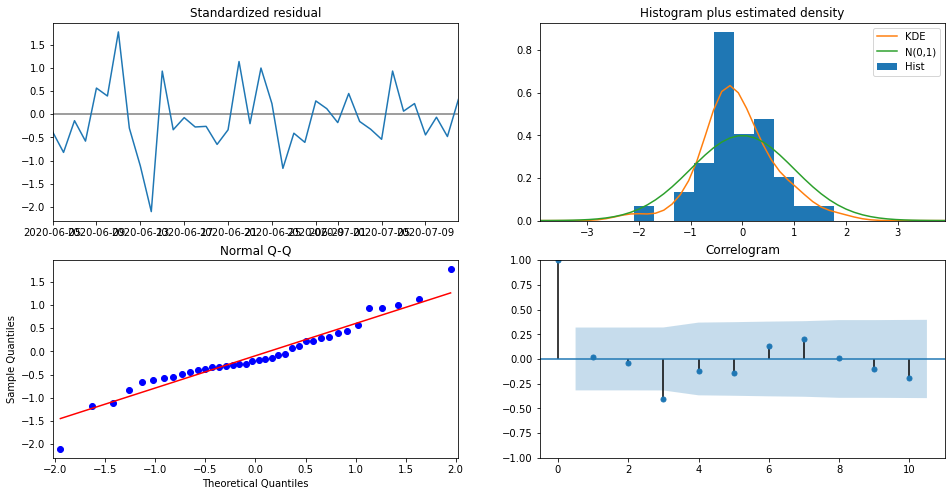

In [12]:
resultados.plot_diagnostics(figsize=(16,8))
plt.show()

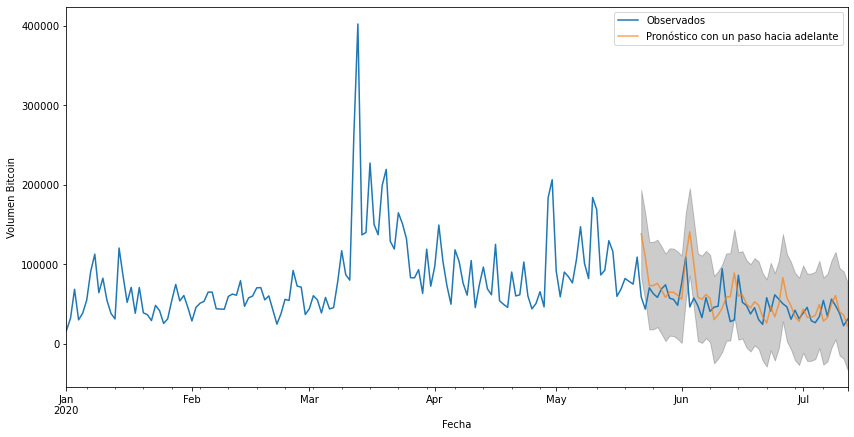

In [13]:
predicciones = resultados.get_prediction(start=pd.to_datetime('2020-05-22'), dynamix=False)
pred_ci = predicciones.conf_int()
ax = data['5. volume']['2020-01-01':].plot(label='Observados')
predicciones.predicted_mean.plot(ax=ax,label='Pronóstico con un paso hacia adelante',alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color='k',
               alpha=0.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('Volumen Bitcoin')
plt.legend()
plt.show()

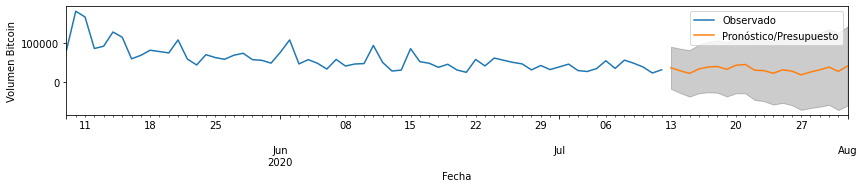

In [14]:
prediccion_futuro = resultados.get_forecast(steps=20)
pred_ci = prediccion_futuro.conf_int()
ax = data['5. volume'].tail(65).plot(label='Observado',figsize=(14,7))
prediccion_futuro.predicted_mean.plot(ax=ax,label='Pronóstico/Presupuesto')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color='k',
               alpha=0.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('Volumen Bitcoin')
plt.legend()
plt.show()

### Bitcoin Price

In [15]:
p = d = q = range(0,2)
#grid search sobre metaparametros 
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1],x[2],12) for x in list(itertools.product(p,d,q))]
for param in pdq:
    for param_estacionales in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data['4b. close (USD)'].tail(65),
                                           order=param,
                                           seasonal_order=param_estacionales,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results = mod.fit()
            print(f'ARIMA {param} x {param_estacionales}12-AIC:{results.aic}')
        except:
            continue

C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 0, 0) x (0, 0, 0, 12)12-AIC:1354.1341144891271
ARIMA (0, 0, 0) x (0, 0, 1, 12)12-AIC:1046.125785379998
ARIMA (0, 0, 0) x (0, 1, 0, 12)12-AIC:778.0130862809486
ARIMA (0, 0, 0) x (0, 1, 1, 12)12-AIC:593.5695005476175
ARIMA (0, 0, 0) x (1, 0, 0, 12)12-AIC:794.7429185835701


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 0, 0) x (1, 0, 1, 12)12-AIC:780.6979833378582
ARIMA (0, 0, 0) x (1, 1, 0, 12)12-AIC:607.7130337022676
ARIMA (0, 0, 0) x (1, 1, 1, 12)12-AIC:588.2652907336432
ARIMA (0, 0, 1) x (0, 0, 0, 12)12-AIC:1290.5452568306607


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 0, 1) x (0, 0, 1, 12)12-AIC:2077.6069766053947
ARIMA (0, 0, 1) x (0, 1, 0, 12)12-AIC:749.3184121373241


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 0, 1) x (0, 1, 1, 12)12-AIC:560.3009355796273
ARIMA (0, 0, 1) x (1, 0, 0, 12)12-AIC:787.3660736667326


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 0, 1) x (1, 0, 1, 12)12-AIC:753.1153972013128
ARIMA (0, 0, 1) x (1, 1, 0, 12)12-AIC:593.6619407073495
ARIMA (0, 0, 1) x (1, 1, 1, 12)12-AIC:561.0813849979507
ARIMA (0, 1, 0) x (0, 0, 0, 12)12-AIC:876.6091420290342
ARIMA (0, 1, 0) x (0, 0, 1, 12)12-AIC:704.8438731718749
ARIMA (0, 1, 0) x (0, 1, 0, 12)12-AIC:748.8014432556671


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 1, 0) x (0, 1, 1, 12)12-AIC:539.816121805603
ARIMA (0, 1, 0) x (1, 0, 0, 12)12-AIC:717.5259502158233


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 1, 0) x (1, 0, 1, 12)12-AIC:706.9699983156702
ARIMA (0, 1, 0) x (1, 1, 0, 12)12-AIC:560.2718047305906
ARIMA (0, 1, 0) x (1, 1, 1, 12)12-AIC:538.6522704233926


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 1, 1) x (0, 0, 0, 12)12-AIC:859.8784419740002
ARIMA (0, 1, 1) x (0, 0, 1, 12)12-AIC:683.1068738598569
ARIMA (0, 1, 1) x (0, 1, 0, 12)12-AIC:729.8816927339775
ARIMA (0, 1, 1) x (0, 1, 1, 12)12-AIC:524.7980064317629
ARIMA (0, 1, 1) x (1, 0, 0, 12)12-AIC:708.3120152570597


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 1, 1) x (1, 0, 1, 12)12-AIC:685.1035636785571
ARIMA (0, 1, 1) x (1, 1, 0, 12)12-AIC:557.4010488540057


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (0, 1, 1) x (1, 1, 1, 12)12-AIC:523.5516441729912
ARIMA (1, 0, 0) x (0, 0, 0, 12)12-AIC:901.4291629673048
ARIMA (1, 0, 0) x (0, 0, 1, 12)12-AIC:721.5979291110217
ARIMA (1, 0, 0) x (0, 1, 0, 12)12-AIC:757.9415031461939


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 0, 0) x (0, 1, 1, 12)12-AIC:554.4691257056134
ARIMA (1, 0, 0) x (1, 0, 0, 12)12-AIC:721.6569560081018
ARIMA (1, 0, 0) x (1, 0, 1, 12)12-AIC:723.5218673649199


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 0, 0) x (1, 1, 0, 12)12-AIC:557.4979372205223


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 1, 1, 12)12-AIC:556.4563302869467
ARIMA (1, 0, 1) x (0, 0, 0, 12)12-AIC:875.1400925332287


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 0, 1) x (0, 0, 1, 12)12-AIC:697.8084070872707
ARIMA (1, 0, 1) x (0, 1, 0, 12)12-AIC:740.5145736357346


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 0, 1) x (0, 1, 1, 12)12-AIC:535.2966409369905
ARIMA (1, 0, 1) x (1, 0, 0, 12)12-AIC:712.5170262574907


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 0, 1) x (1, 0, 1, 12)12-AIC:701.7004344964212
ARIMA (1, 0, 1) x (1, 1, 0, 12)12-AIC:552.8548078468771


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 0, 1) x (1, 1, 1, 12)12-AIC:534.8338877201479
ARIMA (1, 1, 0) x (0, 0, 0, 12)12-AIC:875.1529053230475
ARIMA (1, 1, 0) x (0, 0, 1, 12)12-AIC:694.6433754368318
ARIMA (1, 1, 0) x (0, 1, 0, 12)12-AIC:745.5824703996086


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 1, 0) x (0, 1, 1, 12)12-AIC:539.4535068119995
ARIMA (1, 1, 0) x (1, 0, 0, 12)12-AIC:694.5415900464092
ARIMA (1, 1, 0) x (1, 0, 1, 12)12-AIC:696.0570406826573


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 1, 0) x (1, 1, 0, 12)12-AIC:543.4255839989754


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 1, 1, 12)12-AIC:537.8966753610457
ARIMA (1, 1, 1) x (0, 0, 0, 12)12-AIC:861.6932600470057
ARIMA (1, 1, 1) x (0, 0, 1, 12)12-AIC:684.0052572136074


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 1, 1) x (0, 1, 0, 12)12-AIC:731.840394421009


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 1, 1, 12)12-AIC:525.7374300509861
ARIMA (1, 1, 1) x (1, 0, 0, 12)12-AIC:696.4304681953118


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency informati

ARIMA (1, 1, 1) x (1, 0, 1, 12)12-AIC:685.4648946024226


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 1, 0, 12)12-AIC:545.2175323971409


C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 1, 1, 12)12-AIC:524.6386561533882


In [16]:

mod = sm.tsa.statespace.SARIMAX(data['4b. close (USD)'].tail(65),
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
resultados = mod.fit()
print(resultados.summary())

C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joavi\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                    4b. close (USD)   No. Observations:                   65
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -257.319
Date:                            Mon, 13 Jul 2020   AIC                            524.639
Time:                                    17:20:33   BIC                            532.827
Sample:                                05-09-2020   HQIC                           527.552
                                     - 07-12-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5595      0.468     -1.196      0.232      -1.476       0.357
ma.L1          0.2659      0.525   

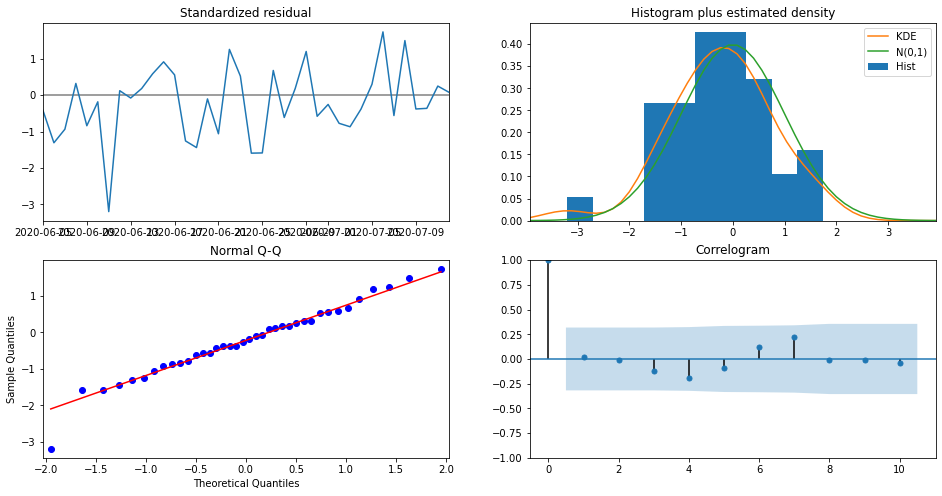

In [17]:
resultados.plot_diagnostics(figsize=(16,8))
plt.show()

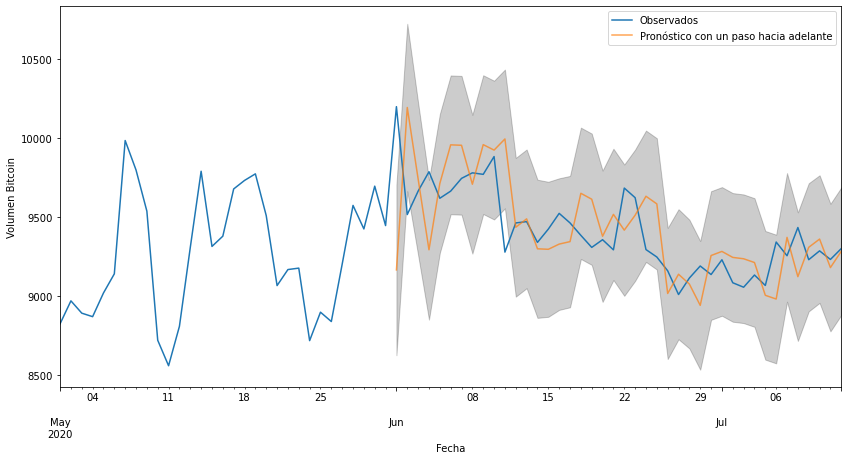

In [38]:
predicciones = resultados.get_prediction(start=pd.to_datetime('2020-06-01'), dynamix=False)
pred_ci = predicciones.conf_int()
ax = data['4b. close (USD)']['2020-05-01':].plot(label='Observados')
predicciones.predicted_mean.plot(ax=ax,label='Pronóstico con un paso hacia adelante',alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color='k',
               alpha=0.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('Volumen Bitcoin')
plt.legend()
plt.show()

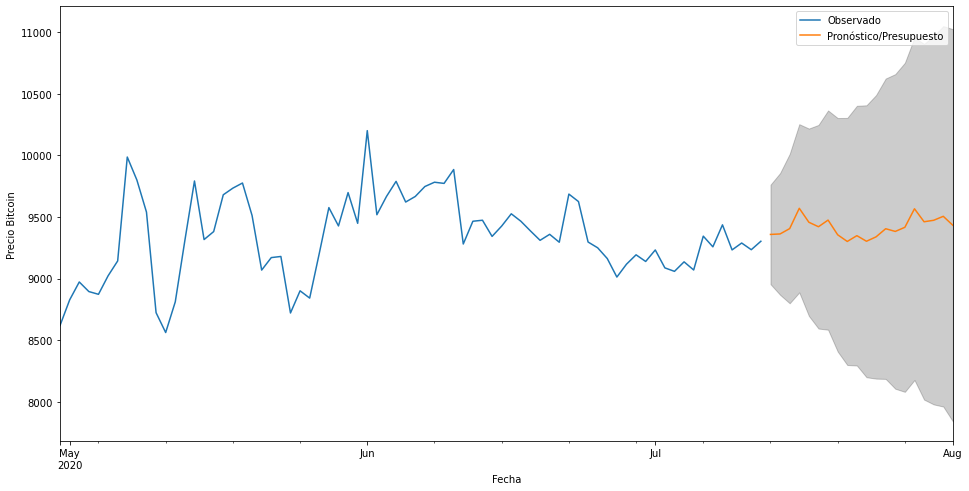

In [69]:
prediccion_futuro = resultados.get_forecast(steps=20)
pred_ci = prediccion_futuro.conf_int()
ax = data['4b. close (USD)'].tail(74).plot(label='Observado',figsize=(14,7))
prediccion_futuro.predicted_mean.plot(ax=ax,label='Pronóstico/Presupuesto',figsize=(16,8))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color='k',
               alpha=0.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio Bitcoin')
plt.legend()
plt.show()